In [51]:
import pandas as pd
import kaggle
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
kaggle.api.authenticate()
kaggle.api.dataset_download_files('rohitgrewal/spotify-youtube-data', path='data', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/rohitgrewal/spotify-youtube-data


In [53]:
original_data = pd.read_csv('data/Spotify Youtube Dataset.csv')

In [54]:
original_data.shape

(20718, 28)

In [55]:
df = original_data.copy()

In [56]:
df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [58]:
df.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [59]:
# Dropping the unnecessary columns
df.drop(columns=['Unnamed: 0', 'Url_spotify', 'Url_youtube', 'Uri'], inplace=True)

In [60]:
df.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Title', 'Channel',
       'Views', 'Likes', 'Comments', 'Description', 'Licensed',
       'official_video', 'Stream'],
      dtype='object')

In [61]:
df.isna().sum()

Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [62]:
df.isna().sum()

Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [63]:
# Dropping all the rows with missing values 
df.dropna(inplace=True)

In [64]:
df.shape

(19170, 24)

In [65]:
df.duplicated().sum()

np.int64(0)

In [66]:
df[['Likes', 'Views', 'Comments']] = df[['Likes', 'Views', 'Comments']].astype('int')

In [67]:
df[['Artist', 'Track', 'Album', 'Album_type', 'Title', 'Channel', 'Description']] = df[['Artist', 'Track', 'Album', 'Album_type', 'Title', 'Channel', 'Description']].astype('str')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19170 entries, 0 to 20717
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            19170 non-null  object 
 1   Track             19170 non-null  object 
 2   Album             19170 non-null  object 
 3   Album_type        19170 non-null  object 
 4   Danceability      19170 non-null  float64
 5   Energy            19170 non-null  float64
 6   Key               19170 non-null  float64
 7   Loudness          19170 non-null  float64
 8   Speechiness       19170 non-null  float64
 9   Acousticness      19170 non-null  float64
 10  Instrumentalness  19170 non-null  float64
 11  Liveness          19170 non-null  float64
 12  Valence           19170 non-null  float64
 13  Tempo             19170 non-null  float64
 14  Duration_ms       19170 non-null  float64
 15  Title             19170 non-null  object 
 16  Channel           19170 non-null  object 
 17

In [69]:
# Top 10 artists with highest views on Youtube
df.groupby('Artist').agg({'Views': 'sum'}).sort_values(by='Views', ascending=False).head(10)


,Views
Artist,
Ed Sheeran,15460207769
CoComelon,14601671211
Katy Perry,13120632075
Charlie Puth,12167594191
Luis Fonsi,11628113031
Justin Bieber,10990787061
Daddy Yankee,10868279671
Bruno Mars,10231841530
Macklemore & Ryan Lewis,10122055560


In [70]:
# Top 10 tracks with the highest streams on Spotify
df.sort_values(by='Stream', ascending=False).head(10)[['Track', 'Stream']]

,Track,Stream
15250,Blinding Lights,3.386520e+09
12452,Shape of You,3.362005e+09
19186,Someone You Loved,2.634013e+09
17937,rockstar (feat. 21 Savage),2.594927e+09
17938,Sunflower - Spider-Man: Into the Spider-Verse,2.538330e+09
17445,Sunflower - Spider-Man: Into the Spider-Verse,2.538330e+09
13503,One Dance,2.522432e+09
16099,Closer,2.456205e+09
16028,Closer,2.456205e+09
14030,Believer,2.369272e+09


In [71]:
# Top 5 tracks with the lowest streams on Spotify
df.sort_values(by='Stream', ascending=True).head(5)[['Track', 'Stream']]

,Track,Stream
8701,Rainbows,6574.0
3774,We Play the Funk - Slynk Remix,7771.0
5161,Teil 9 - Sherlock Holmes und ein Brief von der...,8053.0
5160,Teil 10 - Sherlock Holmes und ein Brief von de...,8074.0
5159,Teil 5 - Sherlock Holmes und der blinde Bettle...,10306.0


In [72]:
df['Album_type'].nunique()

3

In [73]:
# Most common album types on Spotify and how many tracks belong to each album type
common_album_types = df['Album_type'].value_counts()

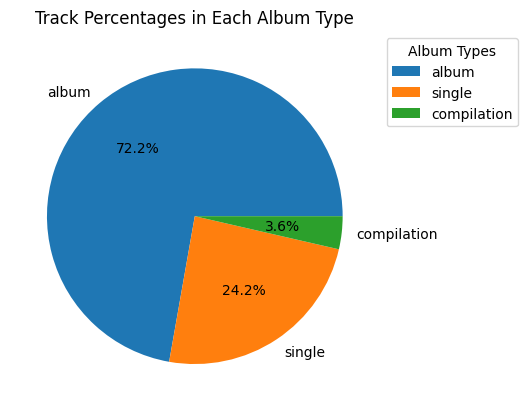

In [74]:
plt.pie(common_album_types, labels=common_album_types.index, autopct='%1.1f%%')
plt.legend(title = "Album Types", bbox_to_anchor=(1, 1))
plt.title('Track Percentages in Each Album Type')
plt.savefig('plots/pie', dpi=300, bbox_inches='tight')
plt.show()

In [75]:
df_temp = df.groupby('Album_type')[['Views', 'Likes', 'Comments']].mean()

In [76]:
df_temp = df_temp.reset_index()
df_temp

,Album_type,Views,Likes,Comments
0,album,1.018768e+08,675165.920260,29243.777104
1,compilation,8.544522e+07,547111.882438,18177.200290
2,single,8.497061e+07,723916.638266,27343.859577


In [77]:
# unpivoting a dataframe
df_melted = pd.melt(df_temp, id_vars='Album_type', var_name='Attribute', value_name='Total')
df_melted

,Album_type,Attribute,Total
0,album,Views,1.018768e+08
1,compilation,Views,8.544522e+07
2,single,Views,8.497061e+07
3,album,Likes,6.751659e+05
4,compilation,Likes,5.471119e+05
5,single,Likes,7.239166e+05
6,album,Comments,2.924378e+04
7,compilation,Comments,1.817720e+04
8,single,Comments,2.734386e+04


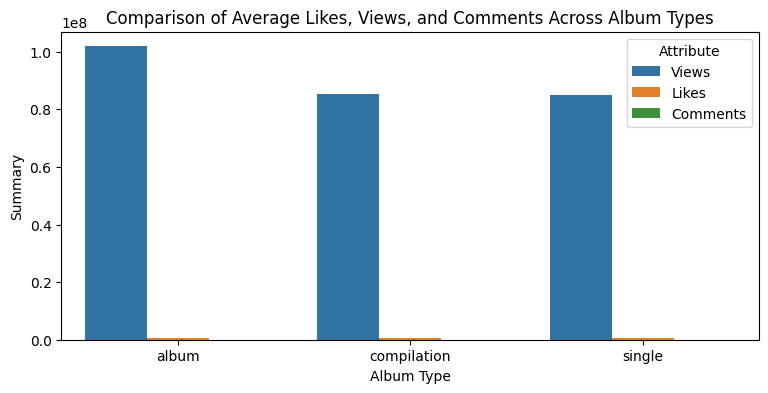

In [78]:
plt.figure(figsize=(9,4))
sns.barplot(x='Album_type', y='Total', hue='Attribute', data=df_melted)
plt.title('Comparison of Average Likes, Views, and Comments Across Album Types')
plt.xlabel('Album Type')
plt.ylabel('Summary')
plt.savefig('plots/comparison_album_types', dpi=300, bbox_inches='tight')
plt.show()

In [79]:
# Top 5 youtube channels based on views
df_views = df.groupby('Channel').agg({'Views': 'sum'}).sort_values(by='Views', ascending=False).head(5)
df_views

,Views
Channel,
T-Series,47798638201
LuisFonsiVEVO,21702521043
CalvinHarrisVEVO,18281142527
Macklemore,17003410965
Ed Sheeran,16918224412


In [80]:
df_views = df_views.reset_index()

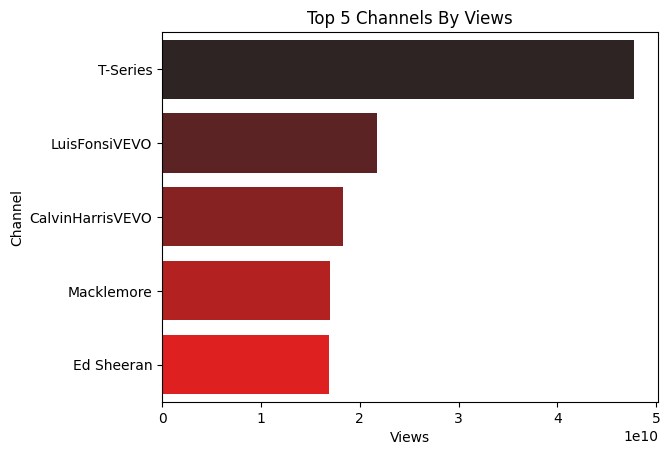

In [81]:
sns.barplot(x='Views', y='Channel', hue='Channel', legend=False, data=df_views, palette='dark:red')
plt.title('Top 5 Channels By Views')
plt.savefig('plots/topfivechannels', dpi=300, bbox_inches='tight')
plt.show()

In [82]:
# Track with the maximum views
df.sort_values(by='Views', ascending=False)['Track'].head(1)

1147    Despacito
Name: Track, dtype: object

In [83]:
df['LikeView_Ratio'] = (df['Likes'] / df['Views']) * 100
df['LikeView_Ratio'].head()

0    0.896958
1    1.498547
2    3.344874
3    0.844645
4    1.002022
Name: LikeView_Ratio, dtype: float64

In [84]:
# Top 5 tracks with the maximum like to view ratio (how many users liked the video after viewing)
df.sort_values(by='LikeView_Ratio', ascending=False)[['Track', 'LikeView_Ratio']].head(5)

,Track,LikeView_Ratio
19968,Intro,24.920421
19969,Safety Zone,23.246000
19967,Future,21.186899
19971,Pandora's Box,20.051832
16297,My Universe - Galantis Remix,17.963316


In [85]:
df.groupby('Album').agg({'Danceability': 'sum'}).sort_values(by='Danceability', ascending=False).head(5)

,Danceability
Album,
Greatest Hits,17.356
Hamilton (Original Broadway Cast Recording),16.001
HEROES & VILLAINS,14.300
RODZINNY BIZNES,13.491
An Evening With Silk Sonic,13.349


In [86]:
df_corr_vars = df[['Views', 'Likes', 'Comments', 'Stream']]

In [87]:
df_corr_vars.corr()

,Views,Likes,Comments,Stream
Views,1.000000,0.891852,0.431122,0.604195
Likes,0.891852,1.000000,0.631488,0.656785
Comments,0.431122,0.631488,1.000000,0.268377
Stream,0.604195,0.656785,0.268377,1.000000


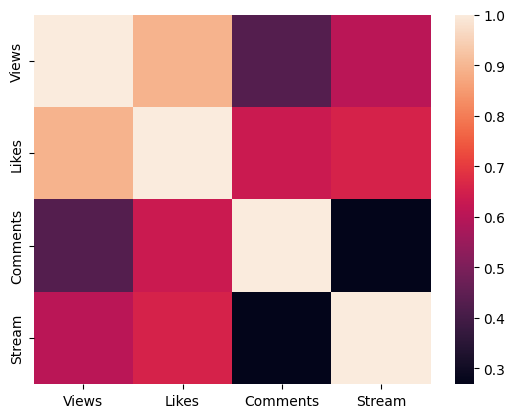

In [88]:
# Views and Likes are highly correlated
# Stream and comments are not highly correlated
# Likes and stream are somewhat correlated
sns.heatmap(df_corr_vars.corr())
plt.savefig('plots/heatmap', dpi=300, bbox_inches='tight')
plt.show()

In [89]:
df.to_csv('data/spyt_cleaned.csv', index=False)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19170 entries, 0 to 20717
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            19170 non-null  object 
 1   Track             19170 non-null  object 
 2   Album             19170 non-null  object 
 3   Album_type        19170 non-null  object 
 4   Danceability      19170 non-null  float64
 5   Energy            19170 non-null  float64
 6   Key               19170 non-null  float64
 7   Loudness          19170 non-null  float64
 8   Speechiness       19170 non-null  float64
 9   Acousticness      19170 non-null  float64
 10  Instrumentalness  19170 non-null  float64
 11  Liveness          19170 non-null  float64
 12  Valence           19170 non-null  float64
 13  Tempo             19170 non-null  float64
 14  Duration_ms       19170 non-null  float64
 15  Title             19170 non-null  object 
 16  Channel           19170 non-null  object 
 17

In [91]:
df.to_csv('data/spyt_cleaned_index.csv', index=True)